In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lfw_dataset as lfw
from lfw_dataset import LFWDataLoader
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()


Using TensorFlow backend.


Data already exist


	First row - same person. second row - different persons



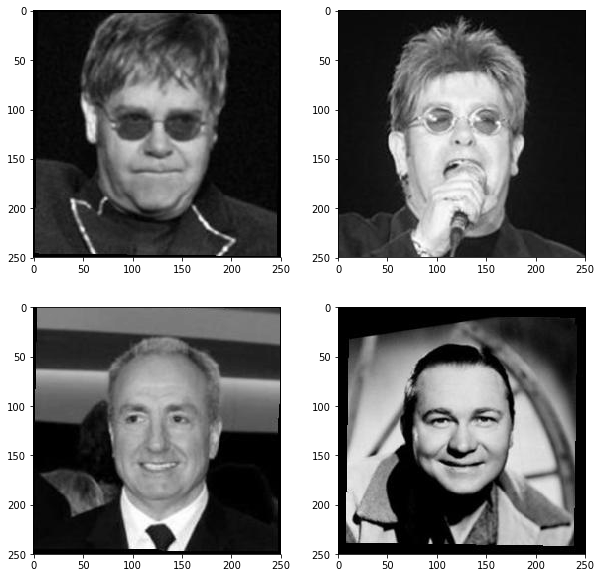

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(same_train_paths))

f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(imread(same_train_paths[random_index][0]),cmap='gray')
ax[0][1].imshow(imread(same_train_paths[random_index][1]),cmap='gray')
ax[1][0].imshow(imread(diff_train_paths[random_index][0]),cmap='gray')
ax[1][1].imshow(imread(diff_train_paths[random_index][1]),cmap='gray')
print('\tFirst row - same person. second row - different persons\n')

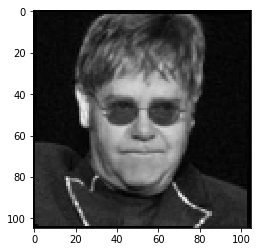

In [10]:
import cv2
plt.imshow(cv2.resize(imread(same_train_paths[random_index][0]), dsize=(105,105), interpolation=cv2.INTER_CUBIC),cmap='gray')

In [4]:
from siamese import Siamese
learning_rate = 0.1
s_net = Siamese(lr=learning_rate)
s_net.build('article_network')

ModuleNotFoundError: No module named 'src'

In [5]:
s_net.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 512)          76692800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512)          0           sequential_1[1][0]               
          

In [8]:
train_history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, batch_size=32, epochs=14, epoch_shuffle=True)

Epoch 1/14
55/55 [==============================] - 19s 348ms/step - loss: 0.6889 - acc: 0.5364 - val_loss: 0.6870 - val_acc: 0.5841
Epoch 2/14
55/55 [==============================] - 14s 261ms/step - loss: 0.6442 - acc: 0.6307 - val_loss: 0.6609 - val_acc: 0.6058
Epoch 3/14
55/55 [==============================] - 14s 261ms/step - loss: 0.6319 - acc: 0.6466 - val_loss: 0.6583 - val_acc: 0.6442
Epoch 4/14
55/55 [==============================] - 14s 261ms/step - loss: 0.6430 - acc: 0.6449 - val_loss: 0.6563 - val_acc: 0.6154
Epoch 5/14
55/55 [==============================] - 14s 261ms/step - loss: 0.6115 - acc: 0.6778 - val_loss: 0.6264 - val_acc: 0.6490
Epoch 6/14
55/55 [==============================] - 14s 261ms/step - loss: 0.5707 - acc: 0.7222 - val_loss: 0.6405 - val_acc: 0.6514
Epoch 7/14
55/55 [==============================] - 14s 261ms/step - loss: 0.4975 - acc: 0.7642 - val_loss: 0.6270 - val_acc: 0.6490
Epoch 8/14
55/55 [==============================] - 14s 262ms/step - 

In [9]:
def evaluate(test_loss, test_accuracy, train_history):

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(train_history.history['acc'])
    axes[0].plot(train_history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(train_history.history['loss'])
    axes[1].plot(train_history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')


In [10]:
test_loss,test_accuracy = s_net.test(same_test_paths,diff_test_paths)

31/31 [==============================] - 3s 96ms/step



Test loss: 0.92
Test accuracy: 0.641


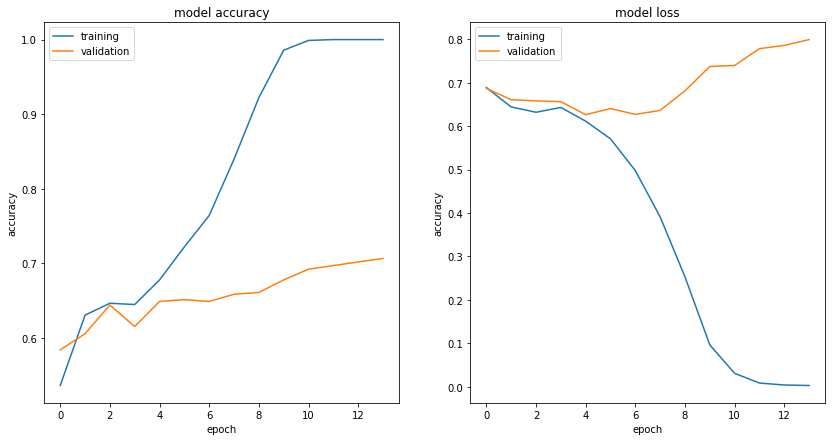

In [11]:
evaluate(test_loss, test_accuracy, train_history)

In [39]:
generator = lfw.LFWDataLoader(same_test_paths, diff_test_paths, batch_size=550, shuffle=False)

In [40]:
X,y = generator[0]

In [41]:
X[0].shape

(550, 250, 250, 1)

In [42]:
pred = s_net.model.predict(X)

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(y, pred)

0.7274578512396694

In [45]:
pred

array([[1.00521974e-01],
       [9.70591187e-01],
       [9.93995905e-01],
       [3.14267986e-02],
       [9.66197610e-01],
       [9.58332121e-01],
       [9.02009569e-03],
       [9.81670618e-01],
       [9.63160753e-01],
       [8.99819016e-01],
       [8.02216351e-01],
       [9.95596230e-01],
       [4.67462659e-01],
       [9.87493932e-01],
       [4.71718401e-01],
       [9.58783388e-01],
       [9.45388749e-02],
       [8.50809753e-01],
       [9.87126946e-01],
       [9.88361001e-01],
       [1.75339013e-01],
       [5.82427204e-01],
       [9.46741223e-01],
       [3.05902790e-02],
       [7.38469541e-01],
       [8.57113302e-02],
       [8.36124599e-01],
       [9.96486783e-01],
       [2.31937036e-01],
       [9.55805957e-01],
       [3.52911294e-01],
       [9.94066834e-01],
       [3.03477161e-02],
       [7.78622925e-01],
       [1.11027166e-01],
       [4.06104177e-01],
       [2.63445266e-02],
       [3.11680377e-01],
       [3.41093168e-02],
       [9.27351177e-01],


In [46]:
from sklearn.metrics import roc_curve

In [48]:
fpr, tpr, thresholds = roc_curve(y,pred)

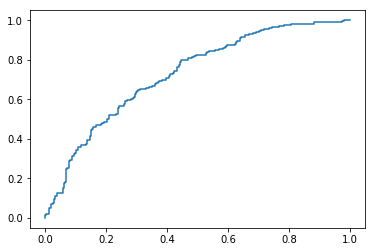

In [50]:
plt.plot(fpr, tpr)